In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
cwd = os.getcwd()

NOTEBOOK_DIR = os.path.dirname(cwd)
ROOT = os.path.dirname(os.path.dirname(os.path.dirname(NOTEBOOK_DIR)))

FIGURES_DIR = os.path.join(ROOT, 'figures/abc_parameterizations/exploding_ipllr')

In [4]:
import sys
sys.path.append(ROOT)

In [5]:
import torch
import pickle
from utils.tools import load_pickle

from utils.tools import read_yaml, set_random_seeds
from utils.plot.abc_parameterizations.initializations import *
from pytorch.configs.model import ModelConfig
from pytorch.models.abc_params.fully_connected import ntk, ip, muP
from utils.plot.abc_parameterizations.results import *

## Define variables and load results

In [11]:
Ls= [6]
WIDTHS = [1024]
N_TRIALS = 5

exp_dir = os.path.join(ROOT, 'experiments')
base_exp = 'fc_ipllr_mnist'
lr = 0.01
batch_size = 128
bias = False
activation = 'relu'

In [22]:
results = get_trial_results(Ls, WIDTHS, N_TRIALS, exp_dir, base_exp, activation, lr, batch_size, bias)

In [20]:
results = results[6][1024]
len(results)

4

In [23]:
epoch_res, step_res = get_epoch_step_results_from_trials(results, pop_keys=('lrs', 'all_losses'))

In [24]:
len(epoch_res)

1

In [25]:
len(step_res)

1

In [27]:
step_res = step_res[6][1024]

In [28]:
epoch_res = epoch_res[6][1024]

In [29]:
len(epoch_res)

4

In [30]:
len(step_res)

4

In [33]:
len(step_res[0]['all_losses'])

3750

In [34]:
step_res[0]['all_losses'][:10]

[tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(13454.0029),
 tensor(nan),
 tensor(nan),
 tensor(nan),
 tensor(nan),
 tensor(nan)]

In [36]:
for r in step_res:
    print(r.keys())

dict_keys(['lrs', 'all_losses'])
dict_keys(['lrs', 'all_losses'])
dict_keys(['lrs', 'all_losses'])
dict_keys(['lrs', 'all_losses'])


In [38]:
training_step_losses = [[loss.item() for loss in r['all_losses'] if (not loss.isnan().all())] for r in step_res]

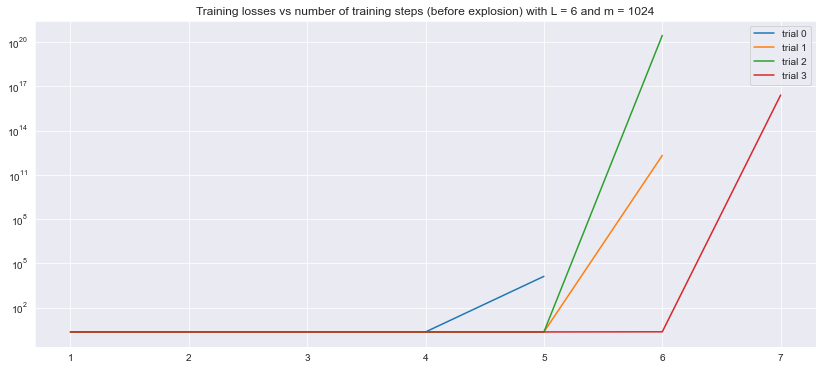

In [54]:
plt.figure(figsize=(14, 6))
for i, losses in enumerate(training_step_losses):
    plt.plot(range(1, len(losses) + 1), losses, label='trial {}'.format(i))
plt.yscale('log')
plt.title('Training losses vs number of training steps (before explosion) with L = 6 and m = 1024')
plt.legend()
plt.savefig(os.path.join(FIGURES_DIR, 'exploding_training_losses_L=6_lr=0.01.png'))
plt.show()